## Exploratory Data Analysis of IMDb dataset
* Data sets found at https://datasets.imdbws.com/
* Description of datasets found here imdb.com/interfaces


In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

sns.set(font_scale=1.2)
sns.set_style("whitegrid")

## Statistics for titles.ratings.tsv


Sample of titles.ratings.tsv dataset: 

 <bound method NDFrame.head of             tconst  averageRating  numVotes
0        tt0000001            5.7      1910
1        tt0000002            5.8       256
2        tt0000003            6.5      1712
3        tt0000004            5.6       169
4        tt0000005            6.2      2527
...            ...            ...       ...
1259468  tt9916690            6.5         6
1259469  tt9916720            5.1       253
1259470  tt9916730            8.4         6
1259471  tt9916766            6.8        21
1259472  tt9916778            7.2        35

[1259473 rows x 3 columns]>

Statistics for titles.ratings.tsv: 

       averageRating    numVotes
count    1259473.00  1259473.00
mean           6.91     1015.15
std            1.39    17009.92
min            1.00        5.00
25%            6.20       11.00
50%            7.10       25.00
75%            7.80       96.00
max           10.00  2636714.00


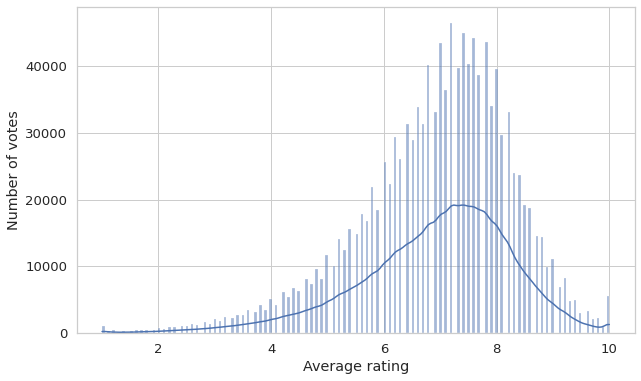

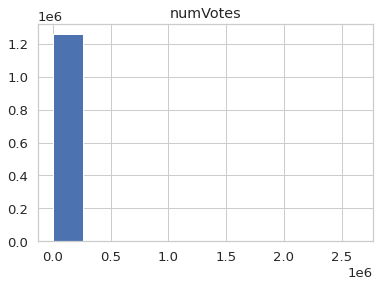

mode is:     averageRating  numVotes
0            7.2         7 


mean is:  averageRating       6.907232
numVotes         1015.148084
dtype: float64 




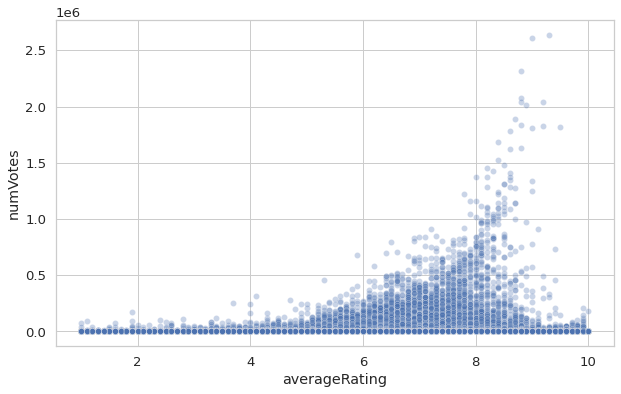

In [23]:
filename = 'data/imdb/title.ratings.tsv'
df = pd.read_csv(filename, sep='\t')

print("\nSample of titles.ratings.tsv dataset: \n\n", df.head)


# This shows percentiles, mean, sd, min, max and format to show 2 dec places
print("\nStatistics for titles.ratings.tsv: \n\n", df.describe().apply(lambda s: s.apply('{0:.2f}'.format)))

# This shows no missing values
#print("df.insnull().sum() : ", df.isnull().sum())

#print("df.memory_usage() : ", df.memory_usage())


# Create basic histogram
fig = plt.figure(figsize=(10, 6))

# df.hist(column='averageRating', bins=200)
sns.histplot(data=df, x='averageRating', bins=200, kde=True)
plt.xlabel('Average rating')
plt.ylabel('Number of votes')
plt.show()

# trying to plot numVotes as a histogram doesn't really show well. --> FIX THIS!
df.hist(column='numVotes')
plt.show()

# find mode of averageRating
print("mode is: ", df.mode(numeric_only=True), "\n\n")

# find mean of averageRating
print("mean is: ", df.mean(numeric_only=True), "\n\n")

# find top 20 movies by num of ratings
df.nlargest(20, 'numVotes')

# Scatter plot of averageRating vs numVotes
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='averageRating', y='numVotes', alpha=0.3)
# df.plot(title="Scatter plot of rating vs num ratings", kind='scatter', x ='averageRating', y='numVotes')

plt.show()


## Statistics for names.basics.tsv


Sample of names.basics.tsv dataset: 

 <bound method NDFrame.head of              nconst         primaryName birthYear deathYear  \
0         nm0000001        Fred Astaire      1899      1987   
1         nm0000002       Lauren Bacall      1924      2014   
2         nm0000003     Brigitte Bardot      1934        \N   
3         nm0000004        John Belushi      1949      1982   
4         nm0000005      Ingmar Bergman      1918      2007   
...             ...                 ...       ...       ...   
11906868  nm9993714   Romeo del Rosario        \N        \N   
11906869  nm9993716       Essias Loberg        \N        \N   
11906870  nm9993717  Harikrishnan Rajan        \N        \N   
11906871  nm9993718         Aayush Nair        \N        \N   
11906872  nm9993719          Andre Hill        \N        \N   

                            primaryProfession  \
0              soundtrack,actor,miscellaneous   
1                          actress,soundtrack   
2         actress,soundtra

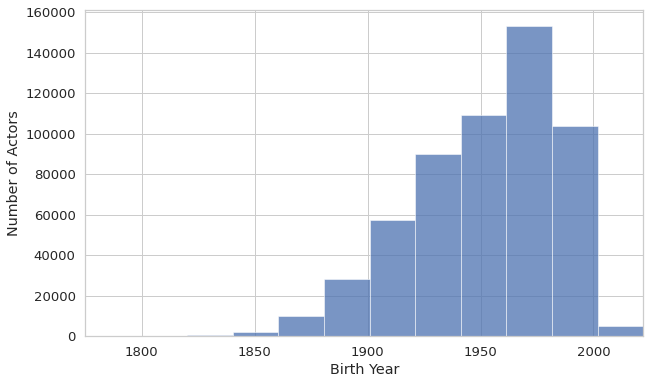

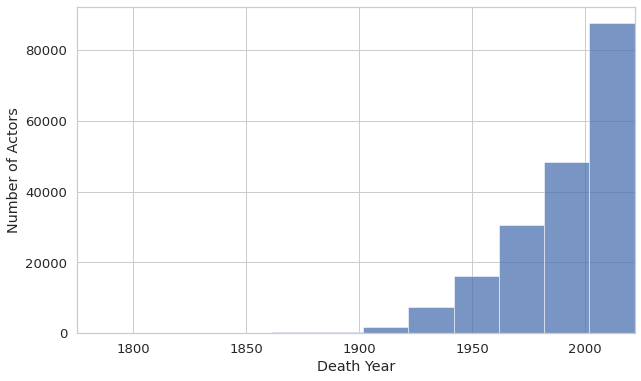

In [24]:
filename = 'data/imdb/name.basics.tsv'

df1 = pd.read_csv(filename, sep='\t')

print("\nSample of names.basics.tsv dataset: \n\n", df1.head)

print("\nStatistics for titles.ratings.tsv: \n\n", df1.describe())

# drop rows where birthYear is /N
df1.drop(df1[df1['birthYear'] == r'\N'].index, inplace = True)
# convert birthYear column from type object to type numeric
df2 = pd.to_numeric(df1['birthYear'])
# Make histogram of actor birthYear
fig = plt.figure(figsize=(10, 6))
sns.histplot(data=df2, bins=100)
# df2.hist(bins=100)
plt.xlabel('Birth Year')
plt.ylabel('Number of Actors')
plt.xlim([1775, 2022])
plt.show()


# drop rows where deathYear is /N
df1.drop(df1[df1['deathYear'] == r'\N'].index, inplace = True)
# convert birthYear column from type object to type numeric
df2 = pd.to_numeric(df1['deathYear'])
# Make histogram of actor deathYear
fig = plt.figure(figsize=(10, 6))
# df2.hist(bins=100)
sns.histplot(data=df2, bins=100)
plt.xlabel('Death Year')
plt.ylabel('Number of Actors')
plt.xlim([1775, 2022])
plt.show()

## Statistics for title.basics.tsv

/tmp/ipykernel_227591/3745983242.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, sep='\t')



Sample of title.basics.tsv dataset: 

       tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              4  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1              Comedy,Short  

Statistics for titles.basics.tsv: 

 count    7.980307e+06
mean     2.004649e+03
std    

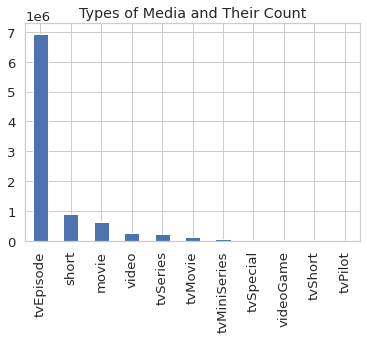

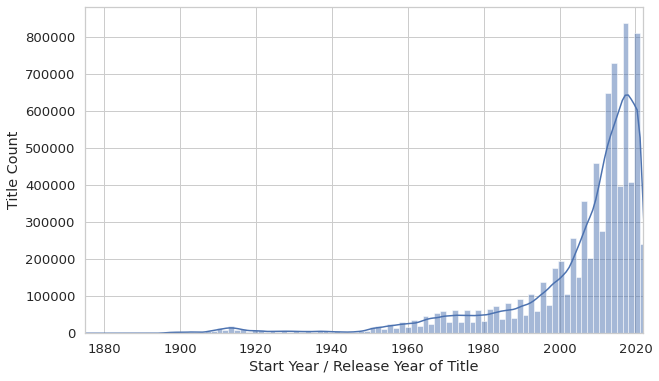

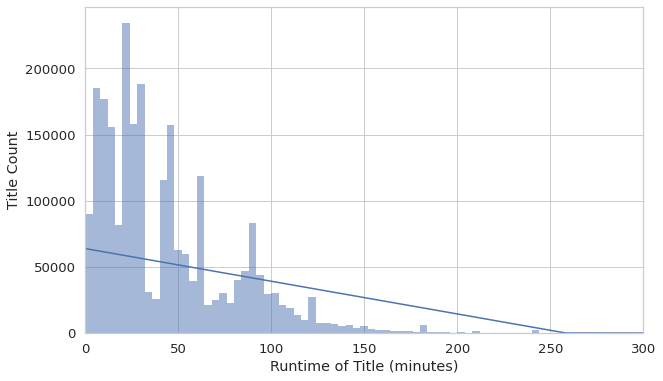


Statistics for titleruntime: 

 count    2.431586e+06
mean     4.442507e+01
std      7.236671e+01
min      0.000000e+00
25%      1.500000e+01
50%      3.000000e+01
75%      6.000000e+01
max      5.142000e+04
Name: runtimeMinutes, dtype: float64


In [31]:
# show dataset size, do a pie chart on the media types, 
# do a kde plot on movie year, etc. 
filename = 'data/imdb/title.basics.tsv'
df = pd.read_csv(filename, sep='\t')

print("\nSample of title.basics.tsv dataset: \n\n", df.head())

print("\nStatistics for titles.basics.tsv: \n\n", df1.describe())

# Piechart is commented out because it looks bad. Use barchart below
#df['titleType'].value_counts().plot(ax=ax, kind='pie')

fig, ax = plt.subplots()
df['titleType'].value_counts().plot(title='Types of Media and Their Count',ax=ax, kind='bar')


# Prep startYear column to make a histogram and a KDE plot
# drop rows where startYear is /N
df.drop(df[df['startYear'] == r'\N'].index, inplace = True)
# convert startYear column from type object to type numeric. df1 is 1 column.
df1 = pd.to_numeric(df['startYear'])
# Make histogram of startYear
fig = plt.figure(figsize=(10, 6))
sns.histplot(data=df1, bins=100, kde=True)
# df1.hist(bins=100)
plt.xlabel('Start Year / Release Year of Title')
plt.ylabel('Title Count')
plt.xlim([1875, 2022])
plt.show()

# KDE plot of release year of a title
# df1.plot.kde(title='KDE Plot of Title Release Year')
# plt.xlabel('Start Year / Release Year of Title')
# plt.show()


# Prep runtimeMinutes column to make a histogram and a KDE plot
# drop rows where runtimeMinutes is /N
df.drop(df[df['runtimeMinutes'] == r'\N'].index, inplace = True)
# convert runtimeMinutes column from type object to type numeric. df2 is 1 column.
df2 = pd.to_numeric(df['runtimeMinutes'])
# Make histogram of runtimeMinutes
fig = plt.figure(figsize=(10, 6))
sns.histplot(data=df2, binwidth=4, kde=True)
# df2.hist(bins=100)
plt.xlabel('Runtime of Title (minutes)')
plt.ylabel('Title Count')
plt.xlim([0, 300])
plt.show()

# KDE plot of title runtime
# df2.plot.kde(title='KDE Plot of Title Runtime')
# plt.xlabel('Runtime of Title (minutes)')
# plt.show()

print("\nStatistics for titleruntime: \n\n", df2.describe())

##  Correlation Between Year and Rating, and Genre and Rating:


Head of title.basics.tsv and titles.ratings.tsv after merging based on titles: 

 <bound method NDFrame.head of            tconst  averageRating  numVotes titleType  \
0       tt0000001            5.7      1913     short   
1       tt0000002            5.8       258     short   
2       tt0000003            6.5      1719     short   
3       tt0000004            5.6       170     short   
4       tt0000005            6.2      2534     short   
...           ...            ...       ...       ...   
154356  tt0250517            4.0       154     movie   
154357  tt0250518            6.3        78     video   
154358  tt0250522            5.2        22     movie   
154359  tt0250524            6.1        62     movie   
154360  tt0250534            6.4        17     movie   

                      primaryTitle               originalTitle  isAdult  \
0                       Carmencita                  Carmencita      0.0   
1           Le clown et ses chiens      Le clown et ses chiens  

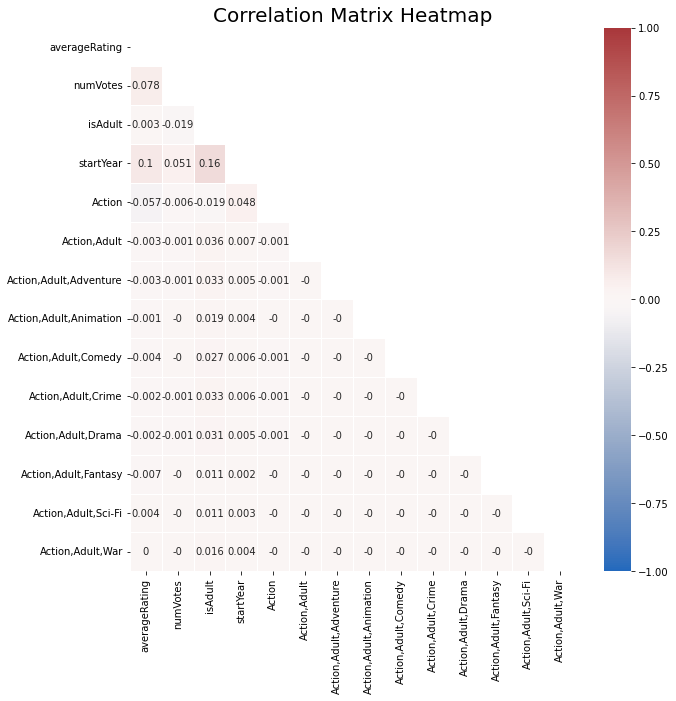

In [25]:
# Re-read in titles.ratings.tsv
df6 = pd.read_csv('titles.ratings.tsv', sep='\t')

# Re-read in title.basics.tsv
df7 = pd.read_csv('title.basics.tsv', sep='\t')

# One-Hot Encoding to find correlation of genres to rating
 # example taken from:
 # https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
genre_dummies = pd.get_dummies(df7.genres) # This makes 1378 genre columns!

# Using dummie1col to select a limited number of columns.
dummie1col = genre_dummies.iloc[:, : 10] # <- change last digit to adjust how many columns
                                         # you want to select.

# Add one-hot encoded dataframe to original dataframe (works - commenting for testing)
df8 = pd.concat([df7, dummie1col], axis=1)
#df8 = pd.concat([df7, genre_dummies], axis=1) # <- Can just append genre_dummies to append all 1378 columns.
                                               # Calculating correlation matrix often crashes server though. 

# Merge title.basics.tsv with one-hot genres (df8) and titles.ratings.tsv (df6) based off titles column.
mergedDF = pd.merge(df6, df8, on='tconst')

# Drop rows where startYear is empty
mergedDF.drop(mergedDF[mergedDF['startYear'] == r'\N'].index, inplace = True)

# convert startYear column from type object to type numeric
mergedDF['startYear'] = pd.to_numeric(mergedDF['startYear'])

# convert averageRating column from type object to type numeric
mergedDF['averageRating'] = pd.to_numeric(mergedDF['averageRating'])

# Print some of the merged dataframe to make sure it looks right
print("\nHead of title.basics.tsv and titles.ratings.tsv after merging based on titles: \n\n", mergedDF.head)

# Print basic correlation matrix
matrix = mergedDF.corr(method='pearson', min_periods=1).round(3)
print("\nBasic Correlation Matrix\n", matrix)

# Used https://datagy.io/python-correlation-matrix/ as a reference on 11/26/2022
print("\n\nSeaBorn Correlation Matrix as Heatmap")
mask = np.triu(np.ones_like(matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask, linewidths=.5, ax=ax) 
plt.title("Correlation Matrix Heatmap", fontsize =20)
plt.show()
